In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
import numpy as np
import pandas as pd
import random
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve , auc
from sklearn.metrics.cluster import fowlkes_mallows_score as gmean
import statistics as stat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_original=pd.read_csv('/content/drive/MyDrive/ecoli-0-6-7_vs_3-5.csv')

df_original

,a1,a2,a3,a4,a5,a6,a7,Class
0,49.0,29.0,48.0,5.0,56.0,24.0,35.0,negative
1,7.0,4.0,48.0,5.0,54.0,35.0,44.0,negative
2,56.0,4.0,48.0,5.0,49.0,37.0,46.0,negative
3,59.0,49.0,48.0,5.0,52.0,45.0,36.0,negative
4,23.0,32.0,48.0,5.0,55.0,25.0,35.0,negative
...,...,...,...,...,...,...,...,...
217,6.0,76.0,1.0,5.0,77.0,59.0,52.0,positive
218,69.0,59.0,48.0,5.0,77.0,39.0,21.0,positive
219,63.0,49.0,48.0,5.0,79.0,45.0,28.0,positive
220,71.0,71.0,48.0,5.0,68.0,43.0,36.0,positive


In [4]:
df_original["Class"].value_counts()
class_label=df_original['Class']
class_label

0      negative
1      negative
2      negative
3      negative
4      negative
         ...   
217    positive
218    positive
219    positive
220    positive
221    positive
Name: Class, Length: 222, dtype: object

In [5]:
label_encoder = LabelEncoder()
df_original["Class"] = label_encoder.fit_transform(df_original["Class"])
df_original.head()

,a1,a2,a3,a4,a5,a6,a7,Class
0,49.0,29.0,48.0,5.0,56.0,24.0,35.0,0
1,7.0,4.0,48.0,5.0,54.0,35.0,44.0,0
2,56.0,4.0,48.0,5.0,49.0,37.0,46.0,0
3,59.0,49.0,48.0,5.0,52.0,45.0,36.0,0
4,23.0,32.0,48.0,5.0,55.0,25.0,35.0,0


In [6]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=5)

x_original=df_original.drop(['Class'],axis='columns')
y_original=df_original.Class
x_original

,a1,a2,a3,a4,a5,a6,a7
0,49.0,29.0,48.0,5.0,56.0,24.0,35.0
1,7.0,4.0,48.0,5.0,54.0,35.0,44.0
2,56.0,4.0,48.0,5.0,49.0,37.0,46.0
3,59.0,49.0,48.0,5.0,52.0,45.0,36.0
4,23.0,32.0,48.0,5.0,55.0,25.0,35.0
...,...,...,...,...,...,...,...
217,6.0,76.0,1.0,5.0,77.0,59.0,52.0
218,69.0,59.0,48.0,5.0,77.0,39.0,21.0
219,63.0,49.0,48.0,5.0,79.0,45.0,28.0
220,71.0,71.0,48.0,5.0,68.0,43.0,36.0


# ***Differential evolution implementation***

# **5 fold cross validation**

In [7]:
precision_s=[]
f1_s=[]
recall_s=[]
accuracy_s=[]
Auc_s=[]
Gmean_s=[]

precision_k=[]
f1_k=[]
recall_k=[]
accuracy_k=[]
Auc_k=[]
Gmean_k=[]

precision_d=[]
f1_d=[]
recall_d=[]
accuracy_d=[]
Auc_d=[]
Gmean_d=[]


for train_index,test_index in kf.split(x_original,y_original):
  x_train,x_test=x_original.iloc[train_index],x_original.iloc[test_index]
  y_train,y_test=y_original.iloc[train_index],y_original.iloc[test_index]
  frames = [x_train,y_train]
  df= pd.concat(frames,axis=1,ignore_index=True)
  # print(df)
  minor=df[df[df.columns[len(df.columns)-1]]==1]
  # print(minor)
  major=df[df[df.columns[len(df.columns)-1]]==0]
  # print(major)

  minor=minor.drop(df.columns[len(df.columns)-1], axis=1)
  minority=minor.to_numpy()
  diff=major.shape[0]-minor.shape[0]
  r=diff
  loop=diff/minor.shape[0]
  if(diff%minor.shape[0]==0):
      iter=int(diff/minor.shape[0])
  else:
    iter=int(diff/minor.shape[0])+1


  # DE ALGORITHM
  for id in range(r):
    if(diff>0):
      distances = np.linalg.norm(minority - minority[id], axis=1)  #calculating the distances to other instances
      k = 4
      nearest_neighbor_ids = distances.argsort()[:k] #finding 3 nearest neighbours n1,n2 and n3
      n1=minority[nearest_neighbor_ids[1]]
      n2=minority[nearest_neighbor_ids[2]]
      n3=minority[nearest_neighbor_ids[3]]
      f=0.5    #scaling 
      donor_v= n1 + f*(n2-n3)
      donor_v
      d=minor.shape[1]       #dimension of independent variables 
      cr=0.7      #crossover rate
      mut=np.zeros((d,1)).flatten()
      inv_mut=np.zeros((d,1)).flatten()
      for i in range(d):
        rand =random.random()
        if(rand<cr):
          mut[i]=1
          inv_mut[i]=0
        else:
          mut[i]=0;
          inv_mut[i]=1;

      new_minor=(donor_v * mut) + (minority[id]*inv_mut);
      minB=minor.min().to_numpy()
      maxB=minor.max().to_numpy()
      for i in range(d):
        if(new_minor[i]<minB[i]):
          new_minor[i]=minB[i];
        if(new_minor[i]>maxB[i]):
          new_minor[i]=maxB[i];
      minority=np.append(minority,new_minor)
      minority=np.reshape(minority,(-1, minor.shape[1]))
      diff=diff-1


  df_minor = pd.DataFrame(minority, columns =['a1','a2','a3','a4','a5','a6','a7'])
  # print(df_minor)

  dup=[]
  for i in range(df_minor.shape[0]):
    dup.append(1)
  Class=np.array(dup)
  Class=np.reshape(Class,(-1,1))
  df_minor_class=pd.DataFrame(Class,columns=['Class'])
  df_minor['Class']=df_minor_class
  majority=major.to_numpy()
  majority=np.reshape(majority,(-1,major.shape[1]))
  majority
  df_major = pd.DataFrame(majority, columns = ['a1','a2','a3','a4','a5','a6','a7','Class'])
  balanced_df=pd.concat([df_minor,df_major],axis=0)
  # print(balanced_df)
  # break
  X_train=balanced_df.drop(["Class"], axis=1)
  Y_train=balanced_df.Class
  X_train=X_train.set_axis(['a1','a2','a3','a4','a5','a6','a7'], axis=1, inplace=False)
  x_test=x_test.set_axis(['a1','a2','a3','a4','a5','a6','a7'], axis=1, inplace=False)

  # print(X_train)
  # break
  model_b_s=SVC()
  model_b_k=KNeighborsClassifier(n_neighbors=3)
  model_b_d=DecisionTreeClassifier(random_state=0)

  model_b_s.fit(X_train,Y_train)
  prediction_b_s = model_b_s.predict(x_test)
  model_b_k.fit(X_train,Y_train)
  prediction_b_k = model_b_k.predict(x_test)

  model_b_d.fit(X_train,Y_train)
  prediction_b_d = model_b_d.predict(x_test)

  precision_s.append(precision_score(y_test,prediction_b_s))
  precision_k.append(precision_score(y_test,prediction_b_k))
  precision_d.append(precision_score(y_test,prediction_b_d))

  recall_s.append(recall_score(y_test,prediction_b_s))
  recall_k.append(recall_score(y_test,prediction_b_k))
  recall_d.append(recall_score(y_test,prediction_b_d))

  f1_s.append(f1_score(y_test,prediction_b_s))
  f1_k.append(f1_score(y_test,prediction_b_k))
  f1_d.append(f1_score(y_test,prediction_b_d))

  accuracy_s.append(accuracy_score(y_test,prediction_b_s))
  accuracy_k.append(accuracy_score(y_test,prediction_b_k))
  accuracy_d.append(accuracy_score(y_test,prediction_b_d))


  s_fpr_b,s_tpr_b,threshold_s_b=roc_curve(y_test,prediction_b_s)
  k_fpr_b,k_tpr_b,threshold_k_b=roc_curve(y_test,prediction_b_k)
  d_fpr_b,d_tpr_b,threshold_d_b=roc_curve(y_test,prediction_b_d)


  Auc_s.append(auc(s_fpr_b,s_tpr_b))
  Auc_k.append(auc(k_fpr_b,k_tpr_b))
  Auc_d.append(auc(d_fpr_b,d_tpr_b))


  Gmean_s.append(gmean(y_test,prediction_b_s))
  Gmean_k.append(gmean(y_test,prediction_b_k))
  Gmean_d.append(gmean(y_test,prediction_b_d))



In [8]:
print("-------SVM--------")
print("Gmean_SVM:",Gmean_s)
print("AUC_SVM:",Auc_s)

print("mean of Gmean_s:",stat.mean(Gmean_s))
print("mean of AUC_s:",stat.mean(Auc_s))

print("standard deviation of Gmean_s:",stat.stdev(Gmean_s))
print("standard deviation of AUC_s:",stat.stdev(Auc_s))

print("\n")
print("-------KNN--------")
print("Gmean_KNN:",Gmean_k)
print("AUC_KNN:",Auc_k)

print("mean of Gmean_k:",stat.mean(Gmean_k))
print("mean of AUC_k:",stat.mean(Auc_k))

print("standard deviation of Gmean_k:",stat.stdev(Gmean_k))
print("standard deviation of AUC_k:",stat.stdev(Auc_k))


print("\n")
print("-------DECISION TREE--------")
print("Gmean_DT:",Gmean_d)
print("AUC_DT:",Auc_d)

print("mean of Gmean_d:",stat.mean(Gmean_d))
print("mean of AUC_d:",stat.mean(Auc_d))

print("standard deviation of Gmean_d:",stat.stdev(Gmean_d))
print("standard deviation of AUC_d:",stat.stdev(Auc_d))



-------SVM--------
Gmean_SVM: [0.9489550598310736, 0.9489550598310736, 0.9451154300910802, 0.8260361417556412, 0.6770692387548539]
AUC_SVM: [0.8, 0.8, 0.975, 0.6875, 0.65]
mean of Gmean_s: 0.8692261860527445
mean of AUC_s: 0.7825
standard deviation of Gmean_s: 0.11964764551576182
standard deviation of AUC_s: 0.12673791855636574


-------KNN--------
Gmean_KNN: [0.9489550598310736, 0.9730137483286192, 0.9722755403536227, 0.8260361417556412, 0.8675914383188755]
AUC_KNN: [0.8, 0.9, 0.9874999999999999, 0.6875, 0.9375]
mean of Gmean_k: 0.9175743857175664
mean of AUC_k: 0.8625
standard deviation of Gmean_k: 0.0669477988647665
standard deviation of AUC_k: 0.11956954043568117


-------DECISION TREE--------
Gmean_DT: [0.9489550598310736, 0.9489550598310736, 0.9722755403536227, 0.7483153649657077, 0.7998185872458629]
AUC_DT: [0.8, 0.8, 0.9874999999999999, 0.525, 0.7874999999999999]
mean of Gmean_d: 0.8836639224454681
mean of AUC_d: 0.78
standard deviation of Gmean_d: 0.10213613013657188
standard 

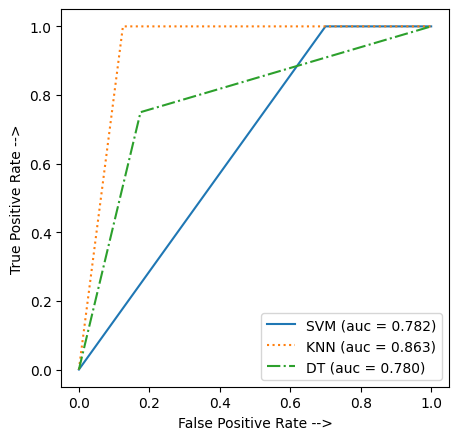

In [9]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(s_fpr_b, s_tpr_b, linestyle='-', label='SVM (auc = %0.3f)' % stat.mean(Auc_s))
plt.plot(k_fpr_b, k_tpr_b, linestyle=':', label='KNN (auc = %0.3f)' % stat.mean(Auc_k))
plt.plot(d_fpr_b, d_tpr_b, linestyle='dashdot', label='DT (auc = %0.3f)' % stat.mean(Auc_d))

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [10]:
df_original

,a1,a2,a3,a4,a5,a6,a7,Class
0,49.0,29.0,48.0,5.0,56.0,24.0,35.0,0
1,7.0,4.0,48.0,5.0,54.0,35.0,44.0,0
2,56.0,4.0,48.0,5.0,49.0,37.0,46.0,0
3,59.0,49.0,48.0,5.0,52.0,45.0,36.0,0
4,23.0,32.0,48.0,5.0,55.0,25.0,35.0,0
...,...,...,...,...,...,...,...,...
217,6.0,76.0,1.0,5.0,77.0,59.0,52.0,1
218,69.0,59.0,48.0,5.0,77.0,39.0,21.0,1
219,63.0,49.0,48.0,5.0,79.0,45.0,28.0,1
220,71.0,71.0,48.0,5.0,68.0,43.0,36.0,1


In [11]:
precision_s_imb=[]
f1_s_imb=[]
recall_s_imb=[]
accuracy_s_imb=[]
Auc_s_imb=[]
Gmean_s_imb=[]

precision_k_imb=[]
f1_k_imb=[]
recall_k_imb=[]
accuracy_k_imb=[]
Auc_k_imb=[]
Gmean_k_imb=[]

precision_d_imb=[]
f1_d_imb=[]
recall_d_imb=[]
accuracy_d_imb=[]
Auc_d_imb=[]
Gmean_d_imb=[]

for train_index,test_index in kf.split(x_original,y_original):
    x_train_imb,x_test_imb=x_original.iloc[train_index],x_original.iloc[test_index]
    y_train_imb,y_test_imb=y_original.iloc[train_index],y_original.iloc[test_index]
    model_imb_s=SVC()
    model_imb_k=KNeighborsClassifier(n_neighbors=3)
    model_imb_d=DecisionTreeClassifier(random_state=0)

    model_imb_s.fit(x_train_imb,y_train_imb)
    prediction_imb_s = model_imb_s.predict(x_test_imb)

    model_imb_k.fit(x_train_imb,y_train_imb)
    prediction_imb_k = model_imb_k.predict(x_test_imb)

    model_imb_d.fit(x_train_imb,y_train_imb)
    prediction_imb_d = model_imb_d.predict(x_test_imb)
    precision_s_imb.append(precision_score(y_test_imb,prediction_imb_s))
    precision_k_imb.append(precision_score(y_test_imb,prediction_imb_k))
    precision_d_imb.append(precision_score(y_test_imb,prediction_imb_d))

    recall_s_imb.append(recall_score(y_test_imb,prediction_imb_s))
    recall_k_imb.append(recall_score(y_test_imb,prediction_imb_k))
    recall_d_imb.append(recall_score(y_test_imb,prediction_imb_d))

    f1_s_imb.append(f1_score(y_test_imb,prediction_imb_s))
    f1_k_imb.append(f1_score(y_test_imb,prediction_imb_k))
    f1_d_imb.append(f1_score(y_test_imb,prediction_imb_d))

    accuracy_s_imb.append(accuracy_score(y_test_imb,prediction_imb_s))
    accuracy_k_imb.append(accuracy_score(y_test_imb,prediction_imb_k))
    accuracy_d_imb.append(accuracy_score(y_test_imb,prediction_imb_d))


    s_fpr_imb,s_tpr_imb,threshold_s_imb=roc_curve(y_test_imb,prediction_imb_s)
    k_fpr_imb,k_tpr_imb,threshold_k_imb=roc_curve(y_test_imb,prediction_imb_k)
    d_fpr_imb,d_tpr_imb,threshold_d_imb=roc_curve(y_test_imb,prediction_imb_d)


    Auc_s_imb.append(auc(s_fpr_imb,s_tpr_imb))
    Auc_k_imb.append(auc(k_fpr_imb,k_tpr_imb))
    Auc_d_imb.append(auc(d_fpr_imb,d_tpr_imb))


    Gmean_s_imb.append(gmean(y_test_imb,prediction_imb_s))
    Gmean_k_imb.append(gmean(y_test_imb,prediction_imb_k))
    Gmean_d_imb.append(gmean(y_test_imb,prediction_imb_d))






In [12]:
print("-------SVM--------")
print("Gmean_SVM:",Gmean_s_imb)
print("AUC_SVM:",Auc_s_imb)

print("mean of Gmean_s:",stat.mean(Gmean_s_imb))
print("mean of AUC_s:",stat.mean(Auc_s_imb))

print("standard deviation of Gmean_s:",stat.stdev(Gmean_s_imb))
print("standard deviation of AUC_s:",stat.stdev(Auc_s_imb))

print("\n")
print("-------KNN--------")
print("Gmean_KNN:",Gmean_k_imb)
print("AUC_KNN:",Auc_k_imb)

print("mean of Gmean_k:",stat.mean(Gmean_k_imb))
print("mean of AUC_k:",stat.mean(Auc_k_imb))

print("standard deviation of Gmean_k:",stat.stdev(Gmean_k_imb))
print("standard deviation of AUC_k:",stat.stdev(Auc_k_imb))


print("\n")
print("-------DECISION TREE--------")
print("Gmean_DT:",Gmean_d_imb)
print("AUC_DT:",Auc_d_imb)

print("mean of Gmean_d:",stat.mean(Gmean_d_imb))
print("mean of AUC_d:",stat.mean(Auc_d_imb))

print("standard deviation of Gmean_d:",stat.stdev(Gmean_d_imb))
print("standard deviation of AUC_d:",stat.stdev(Auc_d_imb))



-------SVM--------
Gmean_SVM: [0.9489550598310736, 0.9489550598310736, 1.0, 0.9237992878892782, 0.9722755403536227]
AUC_SVM: [0.8, 0.8, 1.0, 0.7374999999999999, 0.9874999999999999]
mean of Gmean_s: 0.9587969895810097
mean of AUC_s: 0.865
standard deviation of Gmean_s: 0.02871378451469828
standard deviation of AUC_s: 0.12035104901910908


-------KNN--------
Gmean_KNN: [0.927722953202361, 0.9489550598310736, 1.0, 0.9038742821189548, 0.9451154300910802]
AUC_KNN: [0.7, 0.8, 1.0, 0.6125, 0.975]
mean of Gmean_k: 0.945133545048694
mean of AUC_k: 0.8175
standard deviation of Gmean_k: 0.03546261294748412
standard deviation of AUC_k: 0.1690044378115557


-------DECISION TREE--------
Gmean_DT: [0.9489550598310736, 0.9489550598310736, 1.0, 0.8221529341843353, 0.9451154300910802]
AUC_DT: [0.8, 0.8, 1.0, 0.8, 0.975]
mean of Gmean_d: 0.9330356967875125
mean of AUC_d: 0.875
standard deviation of Gmean_d: 0.06601510649722007
standard deviation of AUC_d: 0.10307764064044149


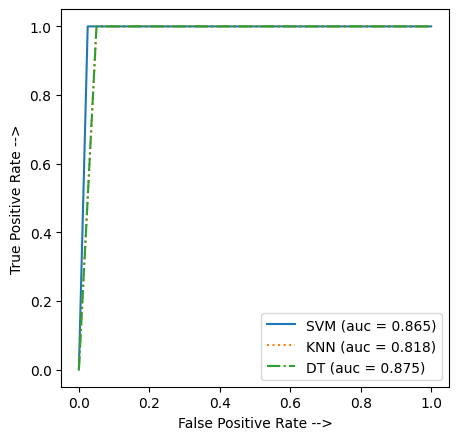

In [13]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(s_fpr_imb, s_tpr_imb, linestyle='-', label='SVM (auc = %0.3f)' % stat.mean(Auc_s_imb))
plt.plot(k_fpr_imb, k_tpr_imb, linestyle=':', label='KNN (auc = %0.3f)' % stat.mean(Auc_k_imb))
plt.plot(d_fpr_imb, d_tpr_imb, linestyle='dashdot', label='DT (auc = %0.3f)' % stat.mean(Auc_d_imb))

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()